In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset (assumes it's in a CSV file)
df = pd.read_csv("dataset.csv")  # replace with your actual file name

# Split features and labels
X = df[['Feature1', 'Feature2']]
y = df['Class']

# Standardize features (important for neural networks!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



c:\Users\Priyanshu\OneDrive\Documents\program\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


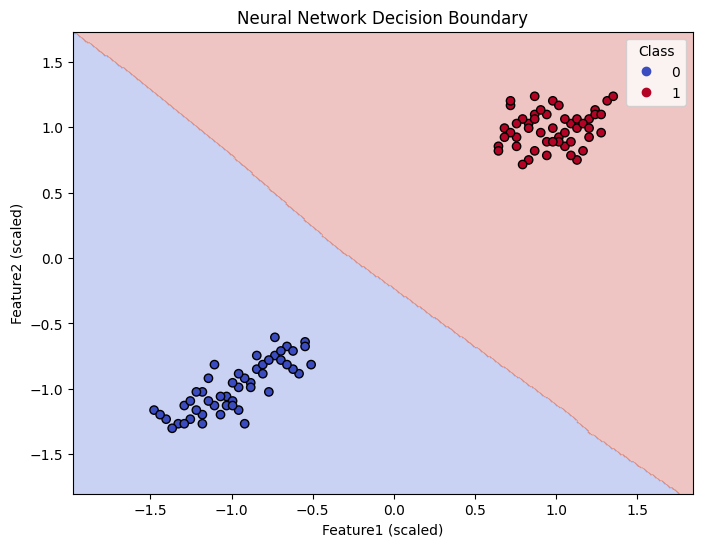

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create dataset directly (from your 100-row data)
# data = {
#     "Feature1": [...],  # paste your 100 Feature1 values here
#     "Feature2": [...],  # paste your 100 Feature2 values here
#     "Class":    [...]   # paste your 100 Class labels here
# }
df = pd.read_csv('dataset.csv')

# Features and labels
X = df[["Feature1", "Feature2"]]
y = df["Class"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=1)
model.fit(X_scaled, y)

# Plot decision boundary
h = 0.01  # mesh step size
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Feature1 (scaled)")
plt.ylabel("Feature2 (scaled)")
plt.title("Neural Network Decision Boundary")
plt.legend(*scatter.legend_elements(), title="Class")
plt.show()
